In [1]:
import cv2
import math
import scipy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    height = shape[0]
    length = shape[1]
    
    x_centre = int(length/2)
    y_centre = int(height/2)
    radius = int(min(length, height)/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = x_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            
            if(x<length and x>0 and y<height and y>0):
                x_coordinates.append(int(x))
                y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return x_coordinates, y_coordinates

def sort_counterclockwise(points, centre = None):
    if centre:
        centre_x, centre_y = centre
    else:
        centre_x, centre_y = sum([x for x,_ in points])/len(points), sum([y for _,y in points])/len(points)
    angles = [math.atan2(y - centre_y, x - centre_x) for x,y in points]
    counterclockwise_indices = sorted(range(len(points)), key=lambda i: angles[i])
    counterclockwise_points = [points[i] for i in counterclockwise_indices]
    return counterclockwise_points

In [3]:
image = cv2.imread("./Images/OS0055EY.JPG")
print(np.shape(image))
(B,G,R) = cv2.split(image)

(1248, 1664, 3)


In [4]:
height = np.shape(G)[0]
length = np.shape(G)[1]

In [5]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# edged = cv2.Canny(blurred, 0, 100)
# arr_edge = np.where(edged==255)

In [6]:
# print(np.shape(arr_edge))
# print(arr_edge)
# x_edge = arr_edge[1]
# y_edge = arr_edge[0]

In [7]:
# plt.figure(figsize = (10,10))
# plt.imshow(G)
# plt.scatter(x_edge, y_edge, color='red')

OLD PART HERE ONWARDS


In [8]:
# number_of_steps = 5
# steps = []
# radius = 624
# steps = np.linspace(0, radius, number_of_steps)

# for i in range(number_of_steps):
#     steps[i] = steps[i] - int(math.pow(i, 3)) + int(math.pow(i, 1.5))

# steps = np.array(steps, dtype=int)
# print(steps)

In [9]:
# x_coordinates, y_coordinates = get_non_uniform_sampling(G, steps)
# number_of_points = (np.shape(x_coordinates))[0]
# print("The number of points is", number_of_points)

In [10]:
# plt.figure(figsize = (10,10))
# plt.imshow(G)
# plt.scatter(x_coordinates, y_coordinates, color='red')
# plt.colorbar()
# plt.title("Image and Sampling Points")

In [11]:
# points = []
# for i , j in zip(x_edge, y_edge):
#     points.append((i,j))

# sorted_points = sort_counterclockwise(points)
# t = np.transpose(sorted_points)
# x_edge = t[0]
# y_edge = t[1]

# interval = 2**(number_of_steps + 1)

# x_edge = np.array(x_edge[0::interval] ,dtype=int)
# y_edge = np.array(y_edge[0::interval], dtype=int)

In [12]:
# x_coordinates = np.concatenate([x_coordinates, x_edge])
# y_coordinates = np.concatenate([y_coordinates, y_edge])

In [13]:
# plt.figure(figsize = (10,10))
# plt.imshow(G)
# plt.scatter(x_coordinates, y_coordinates, color='red')
# plt.colorbar()
# plt.title("Circular Sampling Points")

In [14]:
def get_non_uniform_sampling_final(img, number_of_steps):
    shape = np.shape(img)
    height = shape[0]
    length = shape[1]
    radius = int(min(length, height)/2)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(blurred, 10, 100)
    arr_edge = np.where(edged==255)
    x_edge = arr_edge[1]
    y_edge = arr_edge[0]
    
    steps = np.linspace(0, radius, number_of_steps)

    for i in range(number_of_steps):
        steps[i] = steps[i] - int(math.pow(i, 3)) + int(math.pow(i, 1.5))

    steps = np.array(steps, dtype=int)
    
    x_coordinates, y_coordinates = get_non_uniform_sampling(img, steps)
    points = []
    for i , j in zip(x_edge, y_edge):
        points.append((i,j))
        
    sorted_points = sort_counterclockwise(points)
    t = np.transpose(sorted_points)
    x_edge = t[0]
    y_edge = t[1]

    interval = 2**(number_of_steps + 1)

    x_edge = np.array(x_edge[0::interval] ,dtype=int)
    y_edge = np.array(y_edge[0::interval], dtype=int)
    
    x_coordinates = np.concatenate([x_coordinates, x_edge])
    y_coordinates = np.concatenate([y_coordinates, y_edge])
    
    return x_coordinates, y_coordinates

In [15]:
x, y = get_non_uniform_sampling_final(G, 5)

Text(0.5, 1.0, 'Canny Edge Detection')

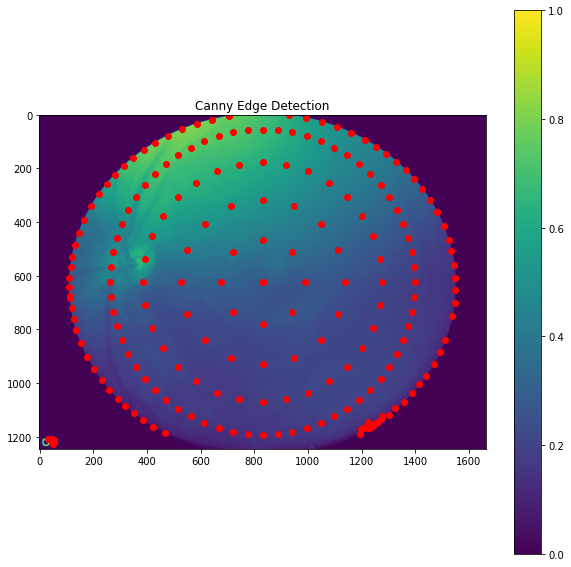

In [16]:
plt.figure(figsize = (10,10))
plt.imshow(G)
plt.scatter(x, y, color='red')
plt.colorbar()
plt.title("Canny Edge Detection")

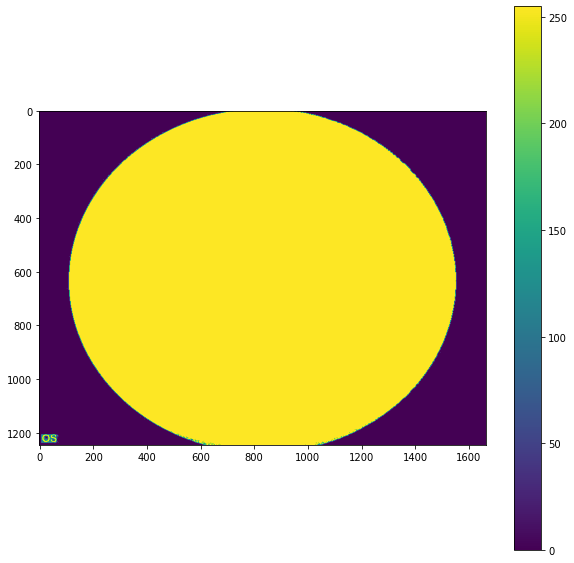

In [17]:
ret, thresh = cv2.threshold(G, 2, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.colorbar()

Text(0.5, 1.0, 'Canny Edge Detection with Thresholding')

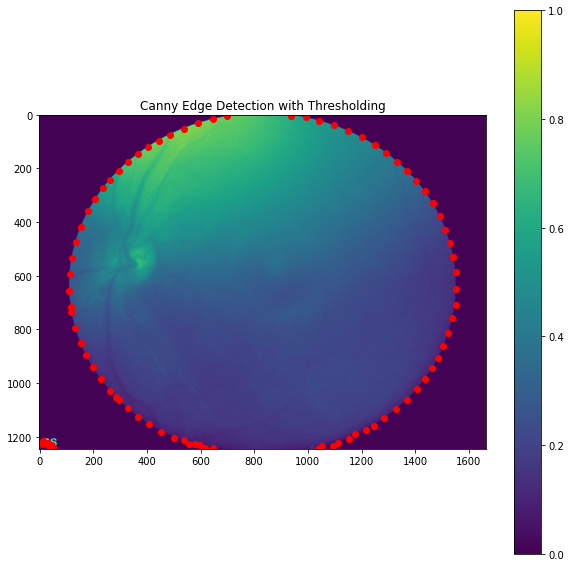

In [27]:
blurred = cv2.GaussianBlur(thresh, (3, 3), 0)
edged = cv2.Canny(blurred, 200, 255)

arr_edge = np.where(edged==255)
x_edge = arr_edge[1]
y_edge = arr_edge[0]

points = []
for i , j in zip(x_edge, y_edge):
    points.append((i,j))

sorted_points = sort_counterclockwise(points)
t = np.transpose(sorted_points)
x_edge = t[0]
y_edge = t[1]

interval = 64
x_edge = np.array(x_edge[0::interval] ,dtype=int)
y_edge = np.array(y_edge[0::interval], dtype=int)

plt.figure(figsize = (10,10))
plt.imshow(G)
plt.scatter(x_edge, y_edge, color='red')
plt.colorbar()
plt.title("Canny Edge Detection with Thresholding")

In [19]:
# kernel = np.ones((8, 8), np.uint8)
# blurred = cv2.GaussianBlur(thresh, (7, 7), 0)
# gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, kernel)
# gradient = np.array(gradient, dtype=np.uint8)

# plt.figure(figsize = (10,10))
# plt.imshow(gradient)
# plt.colorbar()

In [20]:
# edge = np.zeros([height, length])
# p = gradient>0
# for i in range(height):
#     row = p[i, :]
#     row_flip = np.flip(row)
#     first = np.where(row==True)[0][0]
#     last = length - np.where(row_flip==True)[0][0] - 1
#     edge[i, first] = 1
#     edge[i, last] = 1

In [21]:
# plt.figure(figsize = (10,10))
# plt.imshow(edge)
# plt.colorbar()

In [22]:
# edge = np.zeros([height, length])
# p = gradient>0
# for i in range(height):
#     for j in range(length-3):
#         if(p[i,j]==True and p[i,j+1]==True and p[i,j+2]==True):
#             edge[i, j] = 1

# plt.figure(figsize = (10,10))
# plt.imshow(edge)
# plt.colorbar()

In [23]:
# kernel = np.ones((8, 8), np.uint8)
# blurred = cv2.GaussianBlur(edge, (7, 7), 0)
# gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, kernel)
# gradient = np.array(gradient, dtype=np.uint8)

# plt.figure(figsize = (10,10))
# plt.imshow(gradient)
# plt.colorbar()